In [1]:
import numpy as np
import os
import pandas as pd
import csv
from matplotlib import pyplot as plt
import matplotlib.pyplot as pyplot
import PIL.Image as Image
from PIL import ImageOps
import glob
import math

In [2]:
df = pd.read_table("data7_9.txt")

In [3]:
print(df)
df.shape

    Hours  Sulfate
0       2    15.11
1       4    11.36
2       6     9.77
3       8     9.09
4      10     8.48
5      15     7.69
6      20     7.33
7      25     7.06
8      30     6.70
9      40     6.43
10     50     6.16
11     60     5.99
12     70     5.77
13     80     5.64
14     90     5.39
15    110     5.09
16    130     4.87
17    150     4.60
18    160     4.50
19    170     4.36
20    180     4.27


(21, 2)

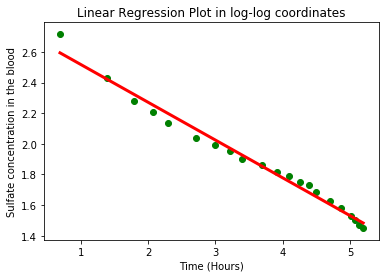

In [4]:
from sklearn import linear_model
reg = linear_model.LinearRegression()
x = np.array(df['Hours'])
y = np.array(df['Sulfate'])

reg.fit(np.log(np.transpose(np.matrix(x))), np.log(np.transpose(np.matrix(y))))
plt.scatter(np.log(x) , np.log(y) ,color ='green')
plt.plot(np.log(np.transpose(np.matrix(x))) ,reg.predict(np.log(np.transpose(np.matrix(x)))) ,color='red',linewidth =3)
plt.title('Linear Regression Plot in log-log coordinates')
plt.xlabel('Time (Hours)')
plt.ylabel('Sulfate concentration in the blood')
plt.show()  

#R-Square measurement
#=var{predicted} / var{actual}
r_square = np.var(reg.predict(np.log(np.transpose(np.matrix(x))))) / np.var(y)

In [5]:
r_square

0.01546083193949855

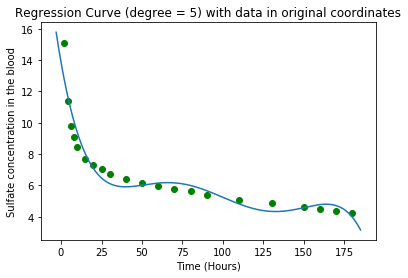

In [6]:
from sklearn import linear_model

reg = linear_model.LinearRegression()
x = np.array(df['Hours'])
y = np.array(df['Sulfate'])
coeffs = np.polyfit(x, y, 5)
x2 = np.arange(min(x)-5, max(x)+5, .01) #use more points for a smoother plot
y2 = np.polyval(coeffs, x2) #Evaluates the polynomial for each x2 value
plt.scatter(x , y ,color ='green')
plt.plot(x2, y2)
plt.title('Regression Curve (degree = 5) with data in original coordinates')
plt.xlabel('Time (Hours)')
plt.ylabel('Sulfate concentration in the blood')
plt.show()  

#R-Square measurement
#=var{predicted} / var{actual}
r_square = np.var(y2)/np.var(y)

In [7]:
r_square

0.617749129062208

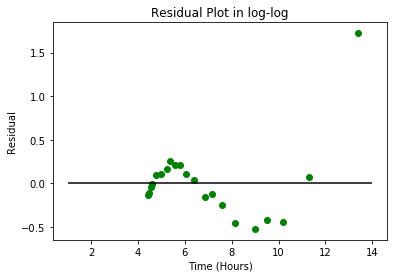

In [5]:
from sklearn import linear_model
reg = linear_model.LinearRegression()
x = np.array(df['Hours'])
y = np.array(df['Sulfate'])
x = np.log(np.transpose(np.matrix(x)))
y = np.log(np.transpose(np.matrix(y)))

reg.fit(x,y)
x_r = np.exp(np.squeeze(np.asarray(reg.predict(x))))
y_r = np.array(df['Sulfate'])-np.exp(np.squeeze(np.asarray(reg.predict(x))))

plt.scatter(x_r ,y_r ,color ='green')
plt.hlines(y = 0, xmin = 1, xmax = 14)

plt.title('Residual Plot in log-log')
plt.xlabel('Time (Hours)')
plt.ylabel('Residual')
plt.show()  

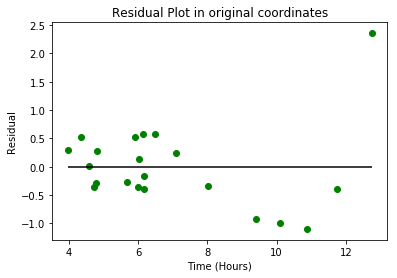

In [9]:
from sklearn import linear_model

x = np.array(df['Hours'])
y = np.array(df['Sulfate'])
coeffs = np.polyfit(x, y, 5)
y2 = np.polyval(coeffs, x) #Evaluates the polynomial for each x2 value
x_r = np.squeeze(np.asarray(y2))
y_r = np.squeeze(np.asarray(y-y2))

plt.scatter(x_r ,y_r ,color ='green')
plt.hlines(y = 0, xmin = min(y2), xmax = max(y2))
plt.title('Residual Plot in original coordinates')
plt.xlabel('Time (Hours)')
plt.ylabel('Residual')
plt.show()

[Argue also with R-square value?]

The residual plots show that using the log log plot gives a better fits than the orgainl data because the the residuals is smaller and the points are normally distributed along the graph, where the organinal data residual plots has a larger residual and the points are curved following the line because points are not fitted. The linear regression plots in the first part also show that the log log plot is better fits the data than the orginal data because most points fall in between the linear line, where the orginal data plots can only fit small numbers of points